#### Librerias 

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import SnowballStemmer
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import unicodedata
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
### Descargar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Cargue datos

In [3]:
Df = pd.read_csv("C:/Users/USER/OneDrive - universidadean.edu.co/5. NLP/Repositorio NLP/Actividad 1/reviews_booking.csv")
Df

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11896\1533673389.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Df = pd.read_csv("C:/Users/USER/OneDrive - universidadean.edu.co/5. NLP/Repositorio NLP/Actividad 1/reviews_booking.csv")


,Unnamed: 0,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10,"Ubicación, comodidades y limpieza",NaN,Sí
2,2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...
438208,438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,"9,0",NaN,NaN,No
438209,438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10,NaN,NaN,No
438210,438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,"1,0",No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10,NaN,NaN,No


In [4]:
Df['Calificación'] = Df['Calificación'].astype(str).str.replace(',', '.').astype(float)
Df = Df.drop("Unnamed: 0", axis=1)
Df

,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10.0,"Ubicación, comodidades y limpieza",NaN,Sí
2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10.0,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10.0,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10.0,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,9.0,NaN,NaN,No
438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10.0,NaN,NaN,No
438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,1.0,No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10.0,NaN,NaN,No


In [5]:
Df.describe()

,Calificación
count,438213.000000
mean,8.401774
std,1.974704
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


### Preprocesamiento

#### 1. Normalización

- Minisculas
- Espacio despues de caracteres
- Eliminar caracteres
- Eliminar numeros
- Eliminar tildes

In [6]:
Df_preprocesado = Df.copy()

# Convertir a minúsculas las columnas específicas
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.lower()
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.lower()

# Añadir espacio después de ciertos caracteres
caracteres = r'[.,;]'
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.replace(caracteres, lambda m: m.group(0) + ' ', regex=True)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.replace(caracteres, lambda m: m.group(0) + ' ', regex=True)

# Eliminar caracteres especiales
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.replace(r"[\W_]+", " ", regex=True)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.replace(r"[\W_]+", " ", regex=True)

# Eliminar números
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.replace(r"\d+", "", regex=True)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.replace(r"\d+", "", regex=True)

# Función para eliminar tildes
def eliminar_tildes(texto):
    if isinstance(texto, str):  # Verifica que sea texto
        return ''.join(
            char for char in unicodedata.normalize('NFD', texto)
            if unicodedata.category(char) != 'Mn'
        )
    return texto

# Aplicar la función a las columnas
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].apply(eliminar_tildes)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].apply(eliminar_tildes)

Df_preprocesado

,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,fue la mejor opcion que pudimos haber tomado e...,NaN,Sí
1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10.0,ubicacion comodidades y limpieza,NaN,Sí
2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10.0,el lugar esta muy bien ubicado el apartamento ...,NaN,Sí
3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10.0,todo estuvo perfecto la ubicacion y la relacio...,NaN,Sí
4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10.0,es muy comodo y acogedor la atencion es excele...,NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,9.0,NaN,NaN,No
438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10.0,NaN,NaN,No
438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,1.0,no me parecio nada,no obstante que dos dias antes de mi llegada a...,Sí
438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10.0,NaN,NaN,No


##### Filtrar base positivos

- Se filtran las comentarios con al menos 7 stopwords para garantizar que sean del idioma español
- Se filtran los comentarios con una califcación mayor a 9
- Se filtran comentarios con una logintud minimo da ## para poder obtener mayor informacion util

In [7]:
# Crear una lista de stopwords
stop_words = set(stopwords.words('spanish'))

#Función para contar stopwords en un texto
def count_stopwords(text):
    if not isinstance(text, str):
        return 0
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df_preprocesado['Cosas Positivas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_filtrado_positivo = Df_preprocesado[stopword_counts >= 15]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_filtrado_positivo = Df_filtrado_positivo[Df_filtrado_positivo['Cosas Positivas'].str.split().str.len() > 30]

# Filtrar filas donde 'Calificación' sea mayor a 9
Df_filtrado_positivo = Df_filtrado_positivo[Df_filtrado_positivo['Calificación'] > 9]

Df_filtrado_positivo


,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,fue la mejor opcion que pudimos haber tomado e...,NaN,Sí
7,Colombia,NaN,11 noches,julio de 2023,Persona que viaja sola,21 de julio de 2023,Excelente lugar!,10.0,la limpieza todo tal cual la foto pero lo mejo...,todo estuvo muy bien recomendado al,Sí
17,Ecuador,NaN,5 noches,octubre de 2024,Persona que viaja sola,29 de octubre de 2024,Excepcional,10.0,me gusto poder comprar los alimentos a mi gust...,NaN,Sí
70,Colombia,NaN,1 noche,agosto de 2022,En familia,9 de agosto de 2022,"Maravilloso alojamiento, recomendado!",10.0,la calidad de personas es maravilloso desde qu...,NaN,Sí
476,Ecuador,NaN,1 noche,agosto de 2024,Persona que viaja sola,26 de agosto de 2024,Excepcional,10.0,la atencion como me recibieron es muy buena po...,NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438075,Colombia,Apartamento de 1 dormitorio,5 noches,noviembre de 2024,Persona que viaja sola,10 de noviembre de 2024,Súper,10.0,el apartamento tiene vista muy bonita puedes s...,NaN,Sí
438081,Colombia,Habitación Individual,1 noche,junio de 2024,Persona que viaja sola,2 de junio de 2024,Excelente y buen precio,10.0,el mejor hotel boutique en el que me he quedad...,todo estuvo muy bien,Sí
438083,Colombia,Habitación Individual,1 noche,junio de 2024,Persona que viaja sola,2 de junio de 2024,Confortable y Conveniente,10.0,el personal fue amable y atento la habitacion ...,NaN,Sí
438170,Colombia,Apartamento de 1 dormitorio,11 noches,julio de 2024,En familia,5 de agosto de 2024,Excelente,10.0,excelente ubicacion con muchos museos y zonas ...,NaN,Sí


##### Filtrar base negativos

- Se filtran las comentarios con al menos 7 stopwords para garantizar que sean del idioma español
- Se filtran los comentarios con una califcación menor a 7
- Se filtran comentarios con una logintud minimo de 40 para poder obtener mayor informacion util

In [8]:
# Crear una lista de stopwords
stop_words = set(stopwords.words('spanish'))

#Función para contar stopwords en un texto
def count_stopwords(text):
    if not isinstance(text, str):
        return 0
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df_preprocesado['Cosas Negativas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_filtrado_negativo = Df_preprocesado[stopword_counts >= 20]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_filtrado_negativo = Df_filtrado_negativo[
    (Df_filtrado_negativo['Cosas Negativas'].str.split().str.len() > 20) &
    (Df_filtrado_negativo['Cosas Negativas'].str.split().str.len() <= 70)
]

# Filtrar filas donde 'Calificación' sea menor
Df_filtrado_negativo = Df_filtrado_negativo[Df_filtrado_negativo['Calificación'] < 7]

Df_filtrado_negativo


,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
51,Colombia,NaN,1 noche,abril de 2024,En grupo,14 de abril de 2024,Desilusionada,1.0,solo me gusto que estuviera muy cerca de la em...,yo reserve una habitacion y cuando llegamos no...,Sí
53,Colombia,NaN,6 noches,enero de 2024,Persona que viaja sola,20 de enero de 2024,Mal,3.0,la compresion y solucion con el problema de la...,realmente las instalaciones estan en mal estad...,Sí
61,Puerto Rico,NaN,2 noches,marzo de 2023,Persona que viaja sola,2 de abril de 2023,Aceptable,5.0,la ubicacion los espacios fuera de la habitaci...,la habitacion las sabanas en la cama estaban s...,Sí
86,Colombia,NaN,1 noche,octubre de 2022,En pareja,3 de octubre de 2022,Mal servicio,3.0,NaN,el servicio en el hostal es pesimo no hay vaso...,Sí
88,Colombia,NaN,1 noche,julio de 2022,Persona que viaja sola,30 de julio de 2022,"Esperaba una habitacion mejor, con un aire lim...",5.0,el desayuno me parecio excelente la senora que...,llegue a las de la tarde me dieron una habit...,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438038,Colombia,Habitación Deluxe con cama extragrande,1 noche,octubre de 2024,En pareja,27 de octubre de 2024,Malísima,1.0,el lugar muy central,no habia agua en toda la estadia y el personal...,Sí
438039,Colombia,Habitación Deluxe con cama extragrande,1 noche,noviembre de 2024,Persona que viaja sola,7 de noviembre de 2024,Cancelación de reserva.,1.0,NaN,nada no pude alojarme porque simplemente cance...,Sí
438113,Colombia,Habitación Doble,1 noche,mayo de 2024,Persona que viaja sola,20 de mayo de 2024,No volveré ni lo recomendaré a mis amigos o fa...,2.0,que esta experiencia me enseno que no debo cam...,publicidad enganosa ofrecen servicios que no t...,Sí
438157,Chile,Habitación Doble,1 noche,abril de 2024,Persona que viaja sola,25 de abril de 2024,Malo el alojamiento,3.0,NaN,tv sin control remoto banos con pisos muy peli...,Sí


#### 2. Tokenizacion


##### Comentarios positivos

In [9]:
# Crear el tokenizador con expresión regular para palabras
tokenizer = RegexpTokenizer(r'\w+')

# Aplicar el tokenizador a cada fila de la columna "Cosas Negativas"
Df_filtrado_positivo["Cosas Positivas Tokenizadas"] = Df_filtrado_positivo["Cosas Positivas"].apply(lambda x: tokenizer.tokenize(x))

# Mostrar el DataFrame con la nueva columna tokenizada
Df_filtrado_positivo["Cosas Positivas Tokenizadas"]

0         [fue, la, mejor, opcion, que, pudimos, haber, ...
7         [la, limpieza, todo, tal, cual, la, foto, pero...
17        [me, gusto, poder, comprar, los, alimentos, a,...
70        [la, calidad, de, personas, es, maravilloso, d...
476       [la, atencion, como, me, recibieron, es, muy, ...
                                ...                        
438075    [el, apartamento, tiene, vista, muy, bonita, p...
438081    [el, mejor, hotel, boutique, en, el, que, me, ...
438083    [el, personal, fue, amable, y, atento, la, hab...
438170    [excelente, ubicacion, con, muchos, museos, y,...
438178    [ubicacion, genial, la, zona, muy, segura, dic...
Name: Cosas Positivas Tokenizadas, Length: 5819, dtype: object

##### Comentarios negativos

In [10]:
# Asegurarse de que los datos de texto estén en formato de string antes de tokenizar
#Df_filtrado_negativo["Cosas Negativas"] = Df_filtrado_negativo["Cosas Negativas"].astype(str)

# Aplicar el tokenizador de palabras a cada fila de la columna "Cosas Negativas"
#Df_filtrado_negativo["Cosas Negativas Tokenizadas"] = Df_filtrado_negativo["Cosas Negativas"].apply(lambda x: word_tokenize(x))

# Mostrar el DataFrame con la nueva columna tokenizada
#Df_filtrado_negativo["Cosas Negativas Tokenizadas"]

In [11]:
# Crear el tokenizador con expresión regular para palabras
tokenizer = RegexpTokenizer(r'\w+')

# Aplicar el tokenizador a cada fila de la columna "Cosas Negativas"
Df_filtrado_negativo["Cosas Negativas Tokenizadas"] = Df_filtrado_negativo["Cosas Negativas"].apply(lambda x: tokenizer.tokenize(x))

# Mostrar el DataFrame con la nueva columna tokenizada
Df_filtrado_negativo["Cosas Negativas Tokenizadas"]

51        [yo, reserve, una, habitacion, y, cuando, lleg...
53        [realmente, las, instalaciones, estan, en, mal...
61        [la, habitacion, las, sabanas, en, la, cama, e...
86        [el, servicio, en, el, hostal, es, pesimo, no,...
88        [llegue, a, las, de, la, tarde, me, dieron, un...
                                ...                        
438038    [no, habia, agua, en, toda, la, estadia, y, el...
438039    [nada, no, pude, alojarme, porque, simplemente...
438113    [publicidad, enganosa, ofrecen, servicios, que...
438157    [tv, sin, control, remoto, banos, con, pisos, ...
438199    [el, problema, que, tuve, con, un, duvet, blan...
Name: Cosas Negativas Tokenizadas, Length: 4902, dtype: object

#### 3. Eliminar stopwords

##### Comentarios positivos

In [12]:
# Carga las stopwords en español
stop_words = set(stopwords.words('spanish'))
print(f"Stopwords en español: {stop_words}")

def eliminar_stopwords(lista_palabras):
    if isinstance(lista_palabras, list):  # Verifica si es una lista
        procesadas = [palabra.lower() for palabra in lista_palabras if palabra.lower() not in stop_words]
        return procesadas
    else:
        print(f"No es una lista: {lista_palabras}")  # Debug
        return lista_palabras  # Si no es una lista, devuelve sin cambios

Df_filtrado_positivo["Cosas Positivas Sin Stopwords"] = Df_filtrado_positivo["Cosas Positivas Tokenizadas"].apply(eliminar_stopwords)
Df_filtrado_positivo["Cosas Positivas Sin Stopwords"]

Stopwords en español: {'hubiéramos', 'seáis', 'tuviste', 'nosotros', 'ante', 'estuviste', 'habrás', 'tus', 'tienen', 'habremos', 'donde', 'hemos', 'tengas', 'poco', 'estaría', 'tuviéramos', 'tengáis', 'éramos', 'esto', 'vuestra', 'esta', 'tendríais', 'tuyos', 'me', 'tenido', 'esté', 'tendrías', 'un', 'teniendo', 'fueran', 'antes', 'tuviésemos', 'tengan', 'tenías', 'tenían', 'tuvieseis', 'habidos', 'estos', 'habéis', 'estuvierais', 'estuvieron', 'hubieses', 'habrá', 'te', 'suyas', 'habré', 'hubisteis', 'estuviese', 'nuestra', 'estad', 'porque', 'mí', 'estabais', 'has', 'fueras', 'estabas', 'todo', 'he', 'esa', 'qué', 'seríais', 'sin', 'han', 'tenéis', 'tuviesen', 'suya', 'tuvieses', 'su', 'sobre', 'estoy', 'tenemos', 'serás', 'estuviéramos', 'otras', 'tendríamos', 'estando', 'tú', 'tuvierais', 'sintiendo', 'estaremos', 'estuvo', 'al', 'estábamos', 'seríamos', 'habríamos', 'ha', 'como', 'estuvieras', 'y', 'fueses', 'él', 'estás', 'nuestros', 'sentido', 'hubieras', 'hubiera', 'siente', 'e

0         [mejor, opcion, pudimos, haber, tomado, bogota...
7         [limpieza, tal, foto, mejor, anfitrion, super,...
17        [gusto, poder, comprar, alimentos, gusto, cuen...
70        [calidad, personas, maravilloso, reciben, dan,...
476       [atencion, recibieron, buena, parte, senor, ra...
                                ...                        
438075    [apartamento, vista, bonita, puedes, sentarte,...
438081    [mejor, hotel, boutique, quedado, bogota, aten...
438083    [personal, amable, atento, habitacion, impecab...
438170    [excelente, ubicacion, museos, zonas, turistic...
438178    [ubicacion, genial, zona, segura, dicha, agua,...
Name: Cosas Positivas Sin Stopwords, Length: 5819, dtype: object

##### Comentarios negativos

In [13]:
# Carga las stopwords en español
stop_words = set(stopwords.words('spanish'))
print(f"Stopwords en español: {stop_words}")

def eliminar_stopwords(lista_palabras):
    if isinstance(lista_palabras, list):  # Verifica si es una lista
        procesadas = [palabra.lower() for palabra in lista_palabras if palabra.lower() not in stop_words]
        return procesadas
    else:
        print(f"No es una lista: {lista_palabras}")  # Debug
        return lista_palabras  # Si no es una lista, devuelve sin cambios

Df_filtrado_negativo["Cosas Negativas Sin Stopwords"] = Df_filtrado_negativo["Cosas Negativas Tokenizadas"].apply(eliminar_stopwords)
Df_filtrado_negativo["Cosas Negativas Sin Stopwords"]


Stopwords en español: {'hubiéramos', 'seáis', 'tuviste', 'nosotros', 'ante', 'estuviste', 'habrás', 'tus', 'tienen', 'habremos', 'donde', 'hemos', 'tengas', 'poco', 'estaría', 'tuviéramos', 'tengáis', 'éramos', 'esto', 'vuestra', 'esta', 'tendríais', 'tuyos', 'me', 'tenido', 'esté', 'tendrías', 'un', 'teniendo', 'fueran', 'antes', 'tuviésemos', 'tengan', 'tenías', 'tenían', 'tuvieseis', 'habidos', 'estos', 'habéis', 'estuvierais', 'estuvieron', 'hubieses', 'habrá', 'te', 'suyas', 'habré', 'hubisteis', 'estuviese', 'nuestra', 'estad', 'porque', 'mí', 'estabais', 'has', 'fueras', 'estabas', 'todo', 'he', 'esa', 'qué', 'seríais', 'sin', 'han', 'tenéis', 'tuviesen', 'suya', 'tuvieses', 'su', 'sobre', 'estoy', 'tenemos', 'serás', 'estuviéramos', 'otras', 'tendríamos', 'estando', 'tú', 'tuvierais', 'sintiendo', 'estaremos', 'estuvo', 'al', 'estábamos', 'seríamos', 'habríamos', 'ha', 'como', 'estuvieras', 'y', 'fueses', 'él', 'estás', 'nuestros', 'sentido', 'hubieras', 'hubiera', 'siente', 'e

51        [reserve, habitacion, llegamos, dieron, sucia,...
53        [realmente, instalaciones, estan, mal, dias, c...
61        [habitacion, sabanas, cama, sucias, boronas, c...
86        [servicio, hostal, pesimo, vasos, copas, hielo...
88        [llegue, tarde, dieron, habitacion, ubicada, p...
                                ...                        
438038    [habia, agua, toda, estadia, personal, hotel, ...
438039    [pude, alojarme, simplemente, cancelaron, rese...
438113    [publicidad, enganosa, ofrecen, servicios, cap...
438157    [tv, control, remoto, banos, pisos, peligrosos...
438199    [problema, duvet, blanco, mancho, bocado, choc...
Name: Cosas Negativas Sin Stopwords, Length: 4902, dtype: object

#### 4. Lematización

##### Comentarios positivos

In [14]:
nlp = spacy.load("es_core_news_sm")

# Función para lematizar (sin eliminar stopwords)
def solo_lematizar(lista_palabras):
    if isinstance(lista_palabras, list):  # Asegúrate de que sea una lista
        texto = " ".join(lista_palabras)  # Convierte la lista a un texto
        doc = nlp(texto)  # Procesa el texto con spaCy
        # Lematiza y devuelve todas las palabras (incluyendo stopwords y puntuación si están presentes)
        return [token.lemma_ for token in doc]
    else:
        return lista_palabras  # Devuelve sin cambios si no es una lista

# Aplica la función a la columna
Df_filtrado_positivo["Cosas Positivas Lematizadas"] = Df_filtrado_positivo["Cosas Positivas Sin Stopwords"].apply(solo_lematizar)

# Verifica los resultados
Df_filtrado_positivo["Cosas Positivas Lematizadas"].info()
Df_filtrado_positivo["Cosas Positivas Lematizadas"]


<class 'pandas.core.series.Series'>
Index: 5819 entries, 0 to 438178
Series name: Cosas Positivas Lematizadas
Non-Null Count  Dtype 
--------------  ----- 
5819 non-null   object
dtypes: object(1)
memory usage: 90.9+ KB


0         [mejor, opcion, pudimos, haber, tomar, bogota,...
7         [limpiezar, tal, foto, mejor, anfitrion, super...
17        [gusto, poder, comprar, alimento, gusto, conta...
70        [calidad, persona, maravilloso, recibir, dar, ...
476       [atencion, recibir, buen, parte, senor, raul, ...
                                ...                        
438075    [apartamento, visto, bonito, poder, sentar tú,...
438081    [mejor, hotel, boutique, quedado, bogota, aten...
438083    [personal, amable, atento, habitacion, impecab...
438170    [excelente, ubicacion, museo, zona, turistica,...
438178    [ubicacion, genial, zona, seguro, dicho, agua,...
Name: Cosas Positivas Lematizadas, Length: 5819, dtype: object

##### Comentarios negativos

In [15]:

nlp = spacy.load("es_core_news_sm")

# Función para lematizar (sin eliminar stopwords)
def solo_lematizar(lista_palabras):
    if isinstance(lista_palabras, list):  # Asegúrate de que sea una lista
        texto = " ".join(lista_palabras)  # Convierte la lista a un texto
        doc = nlp(texto)  # Procesa el texto con spaCy
        # Lematiza y devuelve todas las palabras (incluyendo stopwords y puntuación si están presentes)
        return [token.lemma_ for token in doc]
    else:
        return lista_palabras  # Devuelve sin cambios si no es una lista

# Aplica la función a la columna
Df_filtrado_negativo["Cosas Negativas Lematizadas"] = Df_filtrado_negativo["Cosas Negativas Sin Stopwords"].apply(solo_lematizar)

# Verifica los resultados
Df_filtrado_negativo["Cosas Negativas Lematizadas"]



51        [reserve, habitacion, llegar, dar, sucio, noch...
53        [realmente, instalación, estar, mal, dia, comp...
61        [habitacion, sabana, cama, sucio, borona, cabe...
86        [servicio, hostal, pesimo, vaso, copa, hielo, ...
88        [llegar, tarde, dar, habitacion, ubicada, pati...
                                ...                        
438038    [habia, agua, todo, estadia, personal, hotel, ...
438039    [poder, alojar yo, simplemente, cancelar, rese...
438113    [publicidad, enganós, ofrecer, servicio, capac...
438157    [tv, control, remoto, bano, piso, peligroso, a...
438199    [problema, duvet, blanco, mancho, bocado, choc...
Name: Cosas Negativas Lematizadas, Length: 4902, dtype: object

#### 5. Representación numerica

##### Comentarios positivos

##### TF-IDF

In [16]:
# Asegúrate de aplicar la función de lematización y luego convertir la lista de lemas a texto
Df_filtrado_positivo["Cosas Positivas Lematizadas"] = Df_filtrado_positivo["Cosas Positivas Sin Stopwords"].apply(
    lambda x: ' '.join(solo_lematizar(x)) if isinstance(x, list) else x
)

tfidf_vectorizer_positivos= TfidfVectorizer(ngram_range=(2, 2))

# Ajusta y transforma los datos
tfidf_matrix_positivos = tfidf_vectorizer_positivos.fit_transform(Df_filtrado_positivo["Cosas Positivas Lematizadas"])

# Obtén las características (palabras únicas o bigramas)
tfidf_features_positivos = tfidf_vectorizer_positivos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_tfidf_positivos = pd.DataFrame(tfidf_matrix_positivos.toarray(), columns=tfidf_features_positivos)

df_tfidf_positivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Columns: 81292 entries, aaa mil to 良いホテルてした excelente
dtypes: float64(81292)
memory usage: 3.5 GB


In [17]:
# Calcula la importancia promedio de cada término
word_importance = df_tfidf_positivos.mean().sort_values(ascending=False)

# Muestra las 40 palabras/bigramas más importantes
top_words_positivas = word_importance
top_words_positivas

personal amable        0.008880
atencion personal      0.007003
bien ubicado           0.004996
ubicacion excelente    0.004701
personal atento        0.004361
                         ...   
sejourner tres         0.000011
tours operator         0.000011
tours where            0.000011
memir des              0.000011
cle espacir            0.000011
Length: 81292, dtype: float64

##### Count_vectorizer

In [18]:
# Inicializa el CountVectorizer
count_vectorizer_positivos = CountVectorizer(ngram_range=(2, 2))

# Aplica la transformación sobre la columna "Cosas Positivas Sin Stopwords"
count_matrix_positivos = count_vectorizer_positivos.fit_transform(Df_filtrado_positivo["Cosas Positivas Lematizadas"])

# Obtén las características (palabras únicas o bigramas)
count_features_positivos = count_vectorizer_positivos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_count_positivos = pd.DataFrame(count_matrix_positivos.toarray(), columns=count_features_positivos)

df_count_positivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Columns: 81292 entries, aaa mil to 良いホテルてした excelente
dtypes: int64(81292)
memory usage: 3.5 GB


In [19]:
# Calcula la frecuencia promedio de cada término
word_frequency = df_count_positivos.sum(axis=0).sort_values(ascending=False)

word_frequency.head(40)

personal amable        543
atencion personal      415
bien ubicado           258
ubicacion excelente    235
centro comercial       234
excelente ubicacion    221
personal atento        214
super amable           209
desayuno rico          206
cerca aeropuerto       201
hacer sentir           192
desayuno delicioso     191
ubicacion buen         176
ubicacion perfecto     170
check in               168
calidad precio         167
amable atento          167
excelente atencion     165
buen ubicacion         159
cama comoda            156
habitacion comoda      150
personal hotel         147
habitación comoda      147
sentir casa            145
agua caliente          144
cama comodo            141
personal excelente     140
excelente servicio     140
desayuno bueno         137
desayuno variado       136
ubicacion hotel        136
siempre atento         128
personal super         126
quedar cerca           123
relacion calidad       116
siempre dispuesto      114
dispuesto ayudar       113
z

##### Comentarios negativos

##### TF-IDF

In [20]:
Df_filtrado_negativo["Cosas Negativas Lematizadas"] = Df_filtrado_negativo["Cosas Negativas Sin Stopwords"].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)

# Inicializa el vectorizador TF-IDF
tfidf_vectorizer_negativos= TfidfVectorizer(ngram_range=(2, 2))  # Incluye unigramas y bigramas)

# Ajusta y transforma los datos
tfidf_matrix = tfidf_vectorizer_negativos.fit_transform(Df_filtrado_negativo["Cosas Negativas Lematizadas"])

# Obtén las características (palabras únicas o bigramas)
tfidf_features = tfidf_vectorizer_negativos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

# Calcula la importancia promedio de cada término
word_importance = df_tfidf.mean().sort_values(ascending=False)

# Muestra las 20 palabras/bigramas más importantes
top_words_negativas = word_importance.head(40)
print(top_words_negativas)



agua caliente           0.005026
check in                0.003768
aire acondicionado      0.003366
habitacion tenia        0.003200
toda noche              0.002571
dieron habitacion       0.002494
habia agua              0.002388
personal recepcion      0.002269
check out               0.002196
papel higienico         0.002039
demasiado ruido         0.002021
habitacion pequena      0.001883
atencion personal       0.001877
escucha ruido           0.001756
habitacion habia        0.001715
pesimo servicio         0.001708
mal servicio            0.001708
ruido calle             0.001686
puerta bano             0.001593
cambiaron habitacion    0.001587
bano tenia              0.001575
primer dia              0.001562
desayuno incluido       0.001557
personal hotel          0.001540
servicio cliente        0.001540
llegar hotel            0.001528
dia siguiente           0.001484
habitacion bano         0.001479
atencion cliente        0.001430
horas noche             0.001404
mala atenc

In [21]:
# Inicializa el CountVectorizer
count_vectorizer_negativos = CountVectorizer(ngram_range=(2, 2))

# Aplica la transformación sobre la columna "Cosas Positivas Sin Stopwords"
count_matrix_negativos = count_vectorizer_negativos.fit_transform(Df_filtrado_negativo["Cosas Negativas Lematizadas"])

# Obtén las características (palabras únicas o bigramas)
count_features_negativos = count_vectorizer_negativos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_count_negativos = pd.DataFrame(count_matrix_negativos.toarray(), columns=count_features_negativos)

df_count_negativos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Columns: 75788 entries, abajo abertura to zumo pequeno
dtypes: int64(75788)
memory usage: 2.8 GB


In [22]:
# Calcula la frecuencia promedio de cada término
word_frequency = df_count_negativos.sum(axis=0).sort_values(ascending=False)

word_frequency.head(40)

agua caliente           245
check in                170
aire acondicionado      144
habitacion tenia        141
toda noche              104
dieron habitacion        98
habia agua               92
check out                89
personal recepcion       85
papel higienico          79
demasiado ruido          77
atencion personal        70
habitacion pequena       66
mal servicio             65
habitacion habia         62
pesimo servicio          62
escucha ruido            62
bano tenia               59
ruido calle              57
primer dia               57
puerta bano              56
llegar hotel             55
personal hotel           55
dia siguiente            55
cambiaron habitacion     54
desayuno incluido        54
servicio cliente         53
dos personas             50
hacer check              50
mala atencion            49
habitacion bano          49
horas noche              48
mal olor                 47
atencion cliente         47
primer piso              47
altas horas         

#### 6. Kmeans

##### Comentarios positivos

Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\USER\miniconda3\envs\entorno_npl_ean_py3.10\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\USER\miniconda3\envs\entorno_npl_ean_py3.10\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\USER\miniconda3\envs\entorno_npl_ean_py3.10\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\USER\miniconda3\envs\entorno_npl_ean_py3.10\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\USER\miniconda3\envs\entorno_npl_ean_py3.10\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\USER\miniconda3\envs\entorno_npl_ean_py3.10\lib\site-packages\joblib\externals\loky

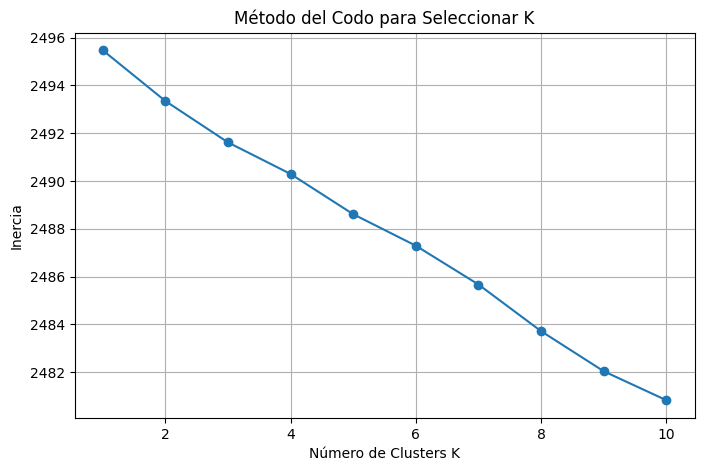

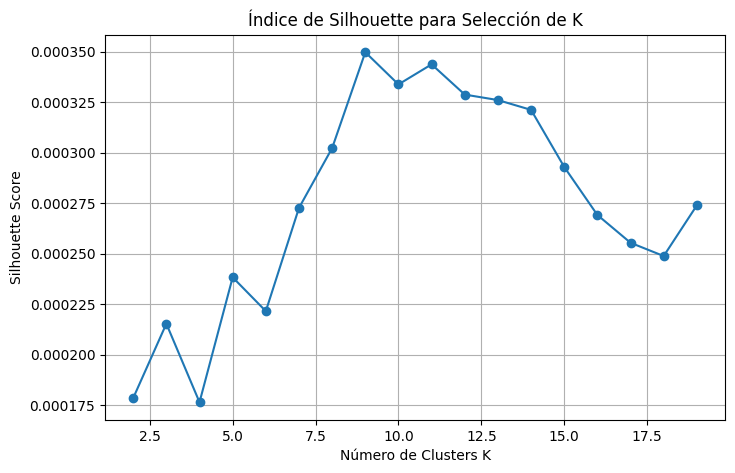

In [23]:
inertias = [] # sumar las funciones de costo para cada K
K_range = range(1, 11)

# Usa directamente tu matriz TF-IDF de positivos
X = tfidf_matrix_positivos[:2500]  # tfidf_matrix_positivos es la matriz dispersa TF-IDF

# Calcular inercia para diferentes valores de K
for k in K_range: # para cada valor haga un Kmeans , hasta 11 , entrenando 11 modelos
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Método del Codo para Seleccionar K")
plt.xlabel("Número de Clusters K")
plt.ylabel("Inercia") # grafico como se comporta la inercia para cada cluster
plt.grid(True)
plt.show()

silhouette_scores = []
for k in range(2, 20):  # El índice de Silhouette no se define para K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title("Índice de Silhouette para Selección de K")
plt.xlabel("Número de Clusters K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


##### Interpretación del índice de Silhouette:
Silhouette bajo (< 0.2):

Indica que los puntos están mal agrupados o los clusters no están claramente definidos.
En tu caso, los valores son extremadamente bajos (en el rango de 0.0001 a 0.0016), lo que confirma una pobre separación entre clusters.

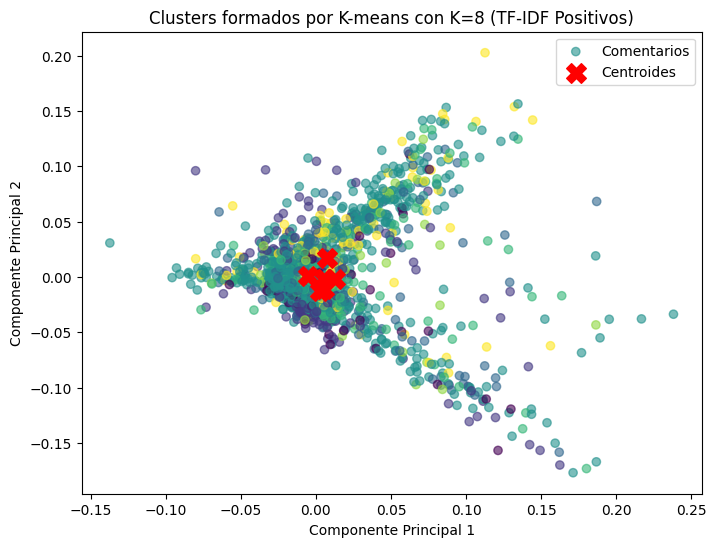

In [24]:
# Aplicar k-means con K=5 (puedes ajustar el número de clusters según sea necesario)
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)  # Entrena el modelo con la matriz TF-IDF

# Predecir los clusters
y_kmeans = kmeans.predict(X)  # Obtiene las asignaciones de cluster para cada comentario

# Reducir la dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Convierte la matriz dispersa a densa para PCA

# Proyectar los centroides al espacio reducido
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Graficar los clusters formados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6, label="Comentarios")  # Visualiza los clusters en 2D
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title("Clusters formados por K-means con K=8 (TF-IDF Positivos)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()



In [25]:
# Obtén los centroides
centroids = kmeans.cluster_centers_

# Obtén los 10 términos más importantes por cluster
top_terms = centroids.argsort()[:, -10:]  # Índices de los 10 términos más importantes

# Mapear los índices a los términos originales del vocabulario usando el vectorizador
top_terms_words = []
for cluster in top_terms:
    words = [tfidf_vectorizer_positivos.get_feature_names_out()[index] for index in cluster]
    top_terms_words.append(words)

# Mostrar los términos más importantes por cluster
for i, terms in enumerate(top_terms_words):
    print(f"Cluster {i + 1}:")
    print(", ".join(terms))
    print()


Cluster 1:
centro comercial, instalación estar, bien mantenido, hotel estar, limpieza hotel, cerca aeropuerto, dentro hotel, estar bien, hotel cerca, atencion excelente

Cluster 2:
excelente ubicacion, llegar tarde, tarde noche, centro comercial, super atento, atento amable, super amable, ubicacion cerca, personal super, cerca aeropuerto

Cluster 3:
llegar caminar, poder llegar, personal amable, restaurante bar, hotel amable, amable servicial, excelente ubicacion, ubicacion buen, desayuno bueno, personal hotel

Cluster 4:
buen ubicacion, amable atento, desayuno rico, personal atento, ubicacion perfecto, hacer sentir, bien ubicado, centro comercial, atencion personal, personal amable

Cluster 5:
habitacion personal, buffet variado, desayuno variado, personal amable, variado delicioso, desayuno buffet, tranquilo seguro, zona tranquilo, personal recepcion, ubicacion excelente

Cluster 6:
pendiente huesped, personal amable, atencion personal, cerca aeropuerto, bien desayuno, limpio agradab

In [26]:
# Verificar que los términos del vectorizador coinciden con las columnas del DataFrame
assert list(tfidf_vectorizer_positivos.get_feature_names_out()) == list(df_tfidf_positivos.columns), \
    "El vocabulario del vectorizador no coincide con las columnas del DataFrame"


##### Analisis K-Means

No se realiza para los negativos ya que no es un metodo adecuado y su clusterización no es efectiva

#### 7. Regresión logistica

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Paso 1: Seleccionar 2500 muestras por DataFrame
df_tfidf_positivos_sample = df_tfidf_positivos.sample(n=1500, random_state=42)
df_tfidf_negativos_sample = df_tfidf.sample(n=1500, random_state=42)

# Paso 2: Etiquetar los datos
df_tfidf_positivos_sample["Etiqueta"] = 1
df_tfidf_negativos_sample["Etiqueta"] = 0

# Paso 3: Unificar los DataFrames
df_tfidf_unificado = pd.concat([df_tfidf_positivos_sample, df_tfidf_negativos_sample])
df_tfidf_unificado.fillna(0, inplace=True)

# Paso 4: Separar datos en entrenamiento y prueba
X = df_tfidf_unificado.drop(columns=["Etiqueta"])
y = df_tfidf_unificado["Etiqueta"]
df_tfidf_unificado

,aaa mil,aaaa super,aankomst stondir,abajo acceder,abajo asique,abajo cafeterio,abajo comoda,abajo departamento,abajo gusto,abajo hotel,...,zonas mantenimiento,zonas oxidadas,zonas publicas,zonas turisticas,zone parque,zulo sitio,zumo alguno,zumo ningun,zumo parecio,zumo pequeno
2228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
"""
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from xgboost import XGBClassifier
import numpy as np

# Configuración del modelo XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# División de datos en entrenamiento (train) y prueba (pred)
X_train, X_pred, y_train, y_pred = train_test_split(X, y, test_size=0.2, random_state=42)

# Validación cruzada en el conjunto de entrenamiento
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

# Entrena el modelo final en los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_proba = model.predict_proba(X_pred)[:, 1]
y_pred_class = model.predict(X_pred)

# Cálculo de la matriz de confusión y métricas
conf_matrix = confusion_matrix(y_pred, y_pred_class)
accuracy = accuracy_score(y_pred, y_pred_class)
precision = precision_score(y_pred, y_pred_class)
recall = recall_score(y_pred, y_pred_class)
f1 = f1_score(y_pred, y_pred_class)

# Resultados
print(f"Accuracy por fold (validación cruzada): {scores}")
print(f"Accuracy promedio (validación cruzada): {np.mean(scores):.4f}")
print(f"Accuracy en conjunto de prueba: {accuracy:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
"""


'\nfrom sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score\nfrom sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer\nfrom xgboost import XGBClassifier\nimport numpy as np\n\n# Configuración del modelo XGBoost\nmodel = XGBClassifier(\n    objective=\'binary:logistic\',\n    n_estimators=100,\n    learning_rate=0.1,\n    max_depth=6,\n    random_state=42\n)\n\n# División de datos en entrenamiento (train) y prueba (pred)\nX_train, X_pred, y_train, y_pred = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Validación cruzada en el conjunto de entrenamiento\nskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)\nscores = cross_val_score(model, X_train, y_train, cv=skf, scoring=\'accuracy\')\n\n# Entrena el modelo final en los datos de entrenamiento\nmodel.fit(X_train, y_train)\n\n# Predicciones en el conjunto de prueba\ny_pred_proba = model.predict_proba(X_pred)[:, 1]\ny_pred_clas

In [29]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Configuración del modelo de Regresión Logística
model = LogisticRegression(random_state=42)

# División de datos en entrenamiento (train) y prueba (pred)
X_train, X_pred, y_train, y_pred = train_test_split(X, y, test_size=0.2, random_state=42)

# Validación cruzada en el conjunto de entrenamiento
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

# Entrena el modelo final en los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_proba = model.predict_proba(X_pred)[:, 1]
y_pred_class = model.predict(X_pred)

# Cálculo de la matriz de confusión y métricas
conf_matrix = confusion_matrix(y_pred, y_pred_class)
accuracy = accuracy_score(y_pred, y_pred_class)
precision = precision_score(y_pred, y_pred_class)
recall = recall_score(y_pred, y_pred_class)
f1 = f1_score(y_pred, y_pred_class)

# Resultados
print(f"Accuracy por fold (validación cruzada): {scores}")
print(f"Accuracy promedio (validación cruzada): {np.mean(scores):.4f}")
print(f"Accuracy en conjunto de prueba: {accuracy:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy por fold (validación cruzada): [0.8875     0.89583333 0.87916667 0.88958333 0.91666667]
Accuracy promedio (validación cruzada): 0.8938
Accuracy en conjunto de prueba: 0.8883
Matriz de Confusión:
[[279   8]
 [ 59 254]]
Precisión: 0.9695
Recall: 0.8115
F1-Score: 0.8835


#### Preguntas



#### Pendientes
- Cambiar entorno y realizarlo con poetry y que actulice dependencias
- Preguntar como hacer para correr comentarios nuevos
- implementar word2vec